<a href="https://colab.research.google.com/github/deepthi25p/CNN-vs-ANN/blob/main/CNN_vs_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CIFAR-10 Image Classification using ANN and CNN
# This notebook trains an ANN and a CNN on the CIFAR-10 dataset
# and compares their performance using accuracy and classification reports.

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def sample_plot(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.axis('off')
    plt.xlabel(classes[y[index]])
    plt.show()


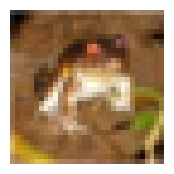

In [ ]:
sample_plot(X_train,y_train,0)

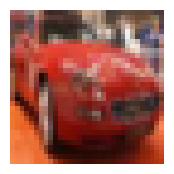

In [ ]:
sample_plot(X_train,y_train,5)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax')
                       ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])



ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3051 - loss: 1.9291
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4249 - loss: 1.6396
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4537 - loss: 1.5559
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4758 - loss: 1.4872
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4948 - loss: 1.4372


In [ ]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4922 - loss: 1.4493


[1.453625202178955, 0.49140000343322754]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report of ANN : \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report of ANN : 
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1000
           1       0.57      0.68      0.62      1000
           2       0.42      0.27      0.33      1000
           3       0.35      0.33      0.34      1000
           4       0.41      0.42      0.42      1000
           5       0.54      0.23      0.33      1000
           6       0.42      0.69      0.52      1000
           7       0.47      0.65      0.54      1000
           8       0.60      0.65      0.62      1000
           9       0.66      0.41      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [ ]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


In [ ]:
cnn=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.BatchNormalization(),
                       layers.MaxPooling2D((2,2)),
                       layers.Dropout(0.25),

                       layers.Conv2D(64,(3,3),activation='relu'),
                       layers.BatchNormalization(),
                       layers.MaxPooling2D((2,2)),
                       layers.Dropout(0.25),

                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dropout(0.5),
                       layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.2224 - loss: 2.1640 - val_accuracy: 0.4222 - val_loss: 1.6304
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3860 - loss: 1.6675 - val_accuracy: 0.5014 - val_loss: 1.4200
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4665 - loss: 1.4814 - val_accuracy: 0.5915 - val_loss: 1.1684
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5069 - loss: 1.3794 - val_accuracy: 0.4990 - val_loss: 1.4977
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5393 - loss: 1.2967 - val_accuracy: 0.6308 - val_loss: 1.0572
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5635 - loss: 1.2358 - val_accuracy: 0.6313 - val_loss: 1.0482
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5808 - loss: 1.1912 - val_accuracy: 0.6114 - val_loss: 1.1346
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5966 - loss: 1.1565 -

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

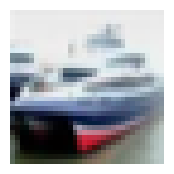

In [ ]:

sample_plot(X_test,y_test,1)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[4.7731595e-03, 3.8126347e-04, 1.4928348e-02, 7.3691005e-01,
        2.2908533e-02, 7.7827737e-02, 8.0431513e-02, 3.4685922e-03,
        5.7347137e-02, 1.0236950e-03],
       [2.7790493e-01, 4.9735893e-02, 4.1990897e-05, 3.7976410e-05,
        2.8880846e-05, 6.2267378e-07, 1.0983542e-05, 7.8977263e-07,
        6.6823989e-01, 3.9980700e-03],
       [2.3370518e-01, 5.5922665e-02, 1.0453818e-02, 1.5168534e-02,
        1.8794399e-02, 2.9234863e-03, 5.4935059e-03, 5.6569153e-03,
        5.5368668e-01, 9.8194808e-02],
       [8.8942742e-01, 4.7521543e-04, 3.9308287e-02, 4.6284421e-04,
        7.1765175e-03, 2.0328298e-05, 2.7576083e-04, 3.0001818e-05,
        6.2679768e-02, 1.4382740e-04],
       [9.1100947e-06, 2.6446995e-07, 5.9306558e-02, 1.1862596e-02,
        2.8177960e-02, 7.3245872e-04, 8.9989418e-01, 3.2895198e-06,
        1.3374850e-05, 2.2374194e-07]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

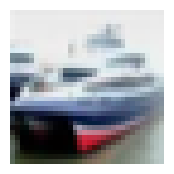

In [ ]:
sample_plot(X_test,y_test,1)

In [ ]:
classes[y_classes[1]]

'ship'

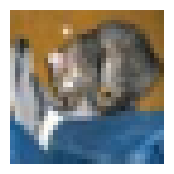

In [ ]:
sample_plot(X_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
print("Classification Report of CNN: \n",classification_report(y_test,y_classes))

Classification Report of CNN: 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.93      0.73      0.82      1000
           2       0.63      0.52      0.57      1000
           3       0.48      0.61      0.54      1000
           4       0.52      0.81      0.64      1000
           5       0.69      0.48      0.57      1000
           6       0.70      0.85      0.77      1000
           7       0.86      0.67      0.75      1000
           8       0.87      0.81      0.84      1000
           9       0.79      0.84      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.70     10000
weighted avg       0.73      0.70      0.70     10000

